## Loading data and initializing parameters

In [2]:
from policies.network_policies.solvers.lead_cache_solver import get_opt_lead_cache, LeadCacheSolverParams
import random

import numpy as np

from utilities import display_single_level_statistics
from simulation.simulation_parameters import SimulationParameters
from simulation.simulation_statistics import SimulationStatistics
from simulation.simulation_runner import SimulationRunner
from policies.ftpl_policy import FTPLPolicy
from policies.lfu_policy import LFUPolicy
from policies.lru_policy import LRUPolicy
from policies.policy import Policy
from typing import List
from data.path import DataPath
from utilities import display_multi_level_statistics
from factories.cache_factory import get_bipartite_systems_from_datasets
from data.loaders import load_bipartite_movielens, Dataset
from data.loaders import load_online_cache_trace
from factories.cache_factory import get_expert_ftpl_policy
from data.loaders import load_movielens



random.seed(42)
get_opt_lead_cache(LeadCacheSolverParams(theta=np.array([[1, 0, 14, 1, 1], [111, 1, 1, 0, 0]]), client_cache_map=[[0, 1], [2, 3]], cache_size=2, catalog_size=5, cache_count=4))

array([[0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.]])

## Defining single cache simulations

In [224]:
from factories.cache_factory import get_expert_iawm_policy


def run_single_cache_simulation(ds: Dataset, cache_size: int):
    policies: List[Policy] = [
        LRUPolicy(cache_size),
        LFUPolicy(cache_size),
        FTPLPolicy(cache_size, ds.catalog_size, ds.trace.size, discount_rate=1),
        # FTPLPolicy(cache_size, ds.catalog_size, ds.trace.size, discount_rate=1.0008),
        # FTPLPolicy(cache_size, ds.catalog_size, ds.trace.size, discount_rate=1.0009),
        # FTPLPolicy(cache_size, ds.catalog_size, ds.trace.size, discount_rate=1.001),
        # FTPLPolicy(cache_size, ds.catalog_size, ds.trace.size, discount_rate=1.002),
        # FTPLPolicy(cache_size, ds.catalog_size, ds.trace.size, discount_rate=1.003),
        # FTPLPolicy(cache_size, ds.catalog_size, ds.trace.size, discount_rate=1.004),
        # FTPLPolicy(cache_size, ds.catalog_size, ds.trace.size, discount_rate=1.01),
        # FTPLPolicy(cache_size, ds.catalog_size, ds.trace.size, discount_rate=1.02),
        # FTPLPolicy(cache_size, ds.catalog_size, ds.trace.size, discount_rate=1.06),
        # FTPLPolicy(cache_size, ds.catalog_size, ds.trace.size, discount_rate=1.07),
        # FTPLPolicy(cache_size, ds.catalog_size, ds.trace.size, discount_rate=1.1),
        get_expert_iawm_policy(cache_size, ds.catalog_size, ds.trace.size, discount_rates=list(np.arange(-2, 1.3, 0.1))),
    ]

    runner = SimulationRunner(threads=len(policies))
    parameters = SimulationParameters(ds.trace, policies)
    statistics: List[SimulationStatistics] = runner.run_simulations(parameters)
    display_single_level_statistics(statistics)

## Define bipartite simulation

In [225]:
def run_multi_cache_simulation(datasets: np.ndarray, cache_size: int, d_regular_degree: int = 2, cache_count: int = 6):
    systems = get_bipartite_systems_from_datasets(datasets, cache_size, d_regular_degree, cache_count)
    runner = SimulationRunner(threads=min([len(systems), 10]))
    statistics = runner.run_bipartite_simulations(systems, datasets)
    display_multi_level_statistics(statistics)

## Run single cache simulation

=========== SN_oscillator, cache at 10.1% ===========
LRU hit rate: 0.0%
LFU hit rate: 0.0%
FTPL, d=1 hit rate: 8.83%
IAWM+FTPL hit rate: 9.67%
OPT hit rate: 10.0%


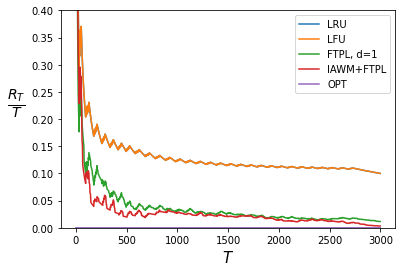

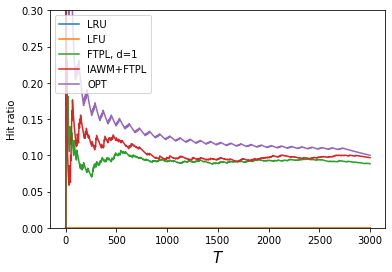

In [228]:
single_cache_size = 10
datasets: List[Dataset] = [
    # load_movielens(DataPath.MOVIE_LENS, trace_length=100_000, cache_size=single_cache_size)
    # load_online_cache_trace(DataPath.OSCILLATOR),
    # load_online_cache_trace(DataPath.CHANGING_OSCILLATOR),
    # load_online_cache_trace(DataPath.CHANGING_POPULARITY_CATALOG),
    # load_online_cache_trace(DataPath.PSN_CATALOG),
    # load_online_cache_trace(DataPath.FIXED_POPULARITY_CATALOG),
    load_online_cache_trace(DataPath.SN_OSCILLATOR)
]

for dataset in datasets:
    print(
        f'=========== '
        f'{dataset.name.split("/")[-1].split(".")[0]},'
        f' cache at {round(100 * single_cache_size / dataset.catalog_size, 1)}%'
        f' ==========='
    )
    run_single_cache_simulation(dataset, single_cache_size)

## Run bipartite simulation

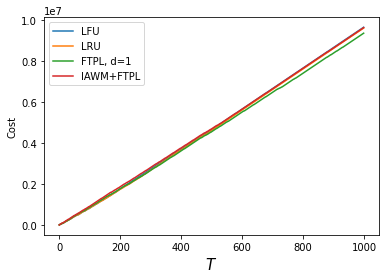

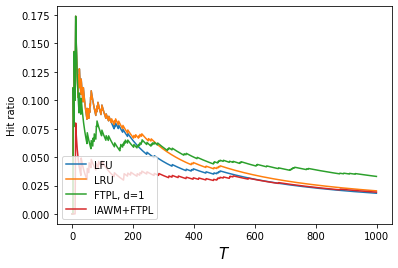

In [7]:
# TODO: Plot MovieLens for single, bi-partite, and hierarchical
# TODO: We do not create one cache per one user, wait maybe we do lol.
# TODO: We do


# How do we amplify system cost? It is said that 1% Hit rate increase doubles performance, how do we make our system look like that as well?
# Why does system cost improve that much irl?
# bi_partite_cache_size = 20
# network_datasets = load_bipartite_movielens(DataPath.MOVIE_LENS, bi_partite_cache_size, trace_length=1000)
# run_multi_cache_simulation(
#     network_datasets,
#     bi_partite_cache_size,
#     d_regular_degree=2,
#     cache_count=10
# )

In [2]:
from policies.network_policies.solvers.lp_opt_cache_solver import get_opt_lp_cache

theta_t = np.zeros((2, 2))
client_cache_map = np.array([0, 1])
cache_size = 2
get_opt_lp_cache(theta_t, client_cache_map, cache_size)

TypeError: 'int' object is not iterable